In [2]:
import os
import Config
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import shutil
import random



## Visualize Some of Images

In [5]:
image_dir = Config.RAW_MACAQUE_DATASETS
# 1) Iterate folders to select a random image and its corresponding label. 
# 2) Plot that image with its bounding boxes 


# Choose only folders of interest
sub_folders = Config.SUB_FOLDERS
all_images = []
for folder in sub_folders: 
    folder_images = os.path.join(image_dir, folder, "images")
    for filename in os.listdir(folder_images):
        if filename.endswith(".jpg"):
            single_image_path = os.path.join(folder_images, filename)
            all_images.append((folder, filename, single_image_path))

print((all_images[1]))
print(f"There are {len(all_images)} images in the parent directory(MacaqueImagePairs)")

# shuffle all images for random selection.
random.shuffle(all_images)
random_image_folder, random_im_name, random_img_path = all_images[0]
print(random_image_folder)
print(random_im_name)
print(random_img_path)

('0_100', 'img_00486_1.jpg', 'MacaqueImagePairs/0_100/images/img_00486_1.jpg')
There are 1000 images in the parent directory(MacaqueImagePairs)
2_100
img_00077_0.jpg
MacaqueImagePairs/2_100/images/img_00077_0.jpg


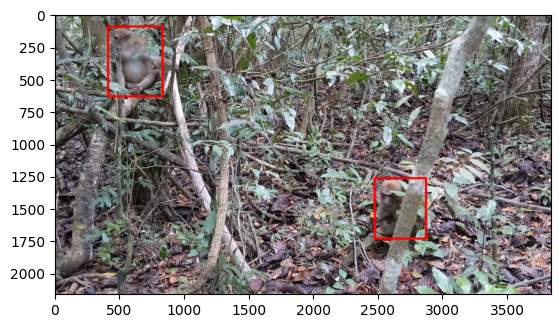

In [7]:
# Read the randomly selected image, and plot it with the bounding boxes
img = cv2.imread(random_img_path)
img_height,img_width, channels = img.shape
# Load the label file 
label = pd.read_csv(os.path.join(image_dir,random_image_folder, "labels_with_ids",os.path.splitext(random_im_name)[0] + ".txt"), header=None, sep=" ")
label.columns = ["class_id", "running_counter_of_objects","x_center","y_center","width", "height"]
# Convert bounding boxes to pixel coordinates for plotting
label["x1"] = label["x_center"] * img_width - (label["width"] * img_width)/2
label["y1"] = label["y_center"] * img_height - (label["height"] * img_height/2)
label["x2"] = label["x_center"] * img_width + (label["width"] * img_width)/2
label["y2"] = label["y_center"] * img_height + (label["height"] * img_height/2)

for i in range(len(label)):
    img = cv2.rectangle(img, (int(label['x1'][i]), int(label['y1'][i])),
                    (int(label['x2'][i]), int(label['y2'][i])), (0, 0, 255), 15)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

